<a href="https://colab.research.google.com/github/thalisrocha/Project-statistics/blob/main/Mini_Projet_MDI220_THALIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
import numpy as np
import datetime
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats
import math


# 1)

In [ ]:
nuclear = pd.read_csv(open("NuclearPowerAccidents2016.csv"))
nuclear.head(1)

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056


Le diagramme Quantile-Quantile est un outil graphique permettant d'évaluer
la pertinence de l'ajustement d'une distribution donnée à un modèle
théorique. Il permet également de comparer deux distributions que l'on estime semblables. Le therme quantile-quantile provient du fait que l'on compare la position
de certains quantiles (les valeurs qui divisent un jeu de données en
intervalles de même probabilités) avec leur position danss la population théorique.

## 1.1

In [ ]:
# v_cost = nuclear['Cost (millions 2013US$)'].dropna()

nuclear['Date'] = pd.to_datetime(nuclear['Date'], format = '%m/%d/%Y')
v_cost = nuclear[(nuclear['Date'] < datetime.datetime(1979, 3, 28)) & (nuclear['Cost (millions 2013US$)'].notnull())]
v_cost = v_cost['Cost (millions 2013US$)']
print(v_cost.size)

55


## 1.2

Par définition, pour les lois qui admettent une densité de probabilité strictement positive sur un intervalle et nulle ailleurs, comme la loi normale, il est possible de trouver un intervalle ouvert $I$ tel que la fonction de répartition de la loi considérée réalise une bijection de $I$ sur l'intervalle ouvert ]0,1[.

Autrement dit, pour tout p strictement compris entre 0 et 1, il existe un unique élément x de $ I $ pour lequel $F_{x}(x) = p $ ou $ P[X \leq x] =p $. Ce nombre $x$ est alors appelé le p-quantile de la loi de $X$ et on peut le calculer par inversion de la fonction de répartition.

Si $X$ suit la loi normale $\mathcal{N}(\mu,\,\sigma^{2}) (\sigma >0)$, $F_{X} $ réalise une bijection de $I=]-∞, +∞[$ sur $]0,1[$ et, pour tout $p ϵ ]0,1[$ , le p-quantile de $X$ est:

$$F_{X}^{-1}(p; μ, σ^{2}) = μ + σΦ^{-1} (p) $$

où $Φ^{-1}$ est la bijection réciproque de la fonction de répartition de la loi centrée réduite. Lorsque $μ= 0$ et $σ = 1$:

$$F_{X}^{-1}(p; 0, 1) = Φ^{-1} (p) $$

Alors:

$$F_{X}^{-1}(p; μ, σ^{2}) = μ + \sqrt{σ^{2}}F_{X}^{-1}(p; 0, 1) $$


En sachant que la distribution cumulative d'une loi normale est égale à:

$ F(x) = \frac{1}{2} [1+erf(\frac{x-μ}{σ\sqrt{2}})]$

En remplaçant $F(x)$ et $x$ pour $p$ et $F^{-1}(p)$, respectivemment:

$p = \frac{1}{2} [1+erf(\frac{F^{-1}(p)-μ}{σ\sqrt{2}})]$

$2p = 1 +erf(\frac{F^{-1}(p)-μ}{σ\sqrt{2}})$

$erf(2p - 1)^{-1}=\frac{F^{-1}(p)-μ}{σ\sqrt{2}}$

$ F^{-1}(p) = σ\sqrt{2} erf(2p - 1)^{-1} +μ$

Pour une loi normale centrée reduite
$\sigma = 1$ et $\mu = 0$, alors:

$ F_{(0,1)}^{-1}(p) = \sqrt{2} erf(2p - 1)^{-1}$

Alors, pour une valeur arbitraire $p \in (0,1)$;

$$F^{-1}(p) = μ + \sqrt{σ^{2}}F_{(0,1)}^{-1}(p) $$



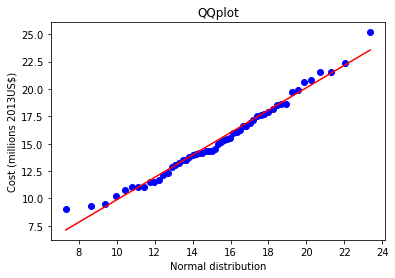

In [ ]:
normale=np.random.normal(15,3.2,55)
norm_params = stats.norm.fit(normale)

stats.probplot(normale, dist='norm', sparams=norm_params,plot=plt)
plt.title('QQplot')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Normal distribution')
plt.show()

QQ-plot de données pour la loi normale, en utilisant la fonction probplot:

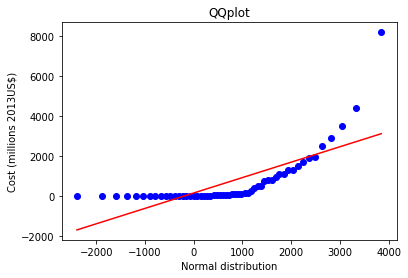

In [ ]:
norm_params = stats.norm.fit(v_cost)

stats.probplot(v_cost, dist='norm', sparams=norm_params,plot=plt)
plt.title('QQplot')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Normal distribution')
plt.show()

## 1.3

La distribution cumulative d'une loi exponentielle est donnée par:

$
F(x;λ)=\begin{cases}
λe^{λx} & \text{si} & x \geq 0\\
0 & \text{si} & x<0\\
\end{cases}
$

Ainsi comme dans la question 1.2:

$p = 1- e^{-\lambda F^{-1}(p;λ)}$

$p -1 = e^{-\lambda F^{-1}(p;λ)}$

$log (p-1) =  -\lambda F^{-1}(p;λ)$

$F^{-1}(p;λ)= - \frac{log (p-1)}{λ}$

Pour $\lambda = 1$:

$F^{-1}(p;1)= - log (p-1)$

Alors:

$F^{-1}(p;λ)= \frac{F^{-1}(p;1)}{λ}$




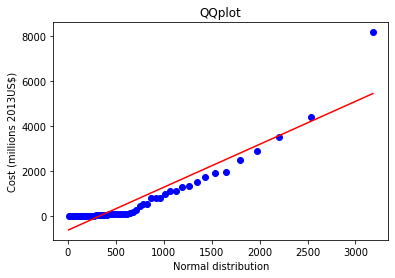

In [ ]:
norm_params = stats.expon.fit(v_cost)

stats.probplot(v_cost, dist='expon', sparams=norm_params,plot=plt)
plt.title('QQplot')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Normal distribution')
plt.show()

## 1.4

Il est possible de constater, en observant le Q-Q plot de données pour la loi normale, que le modèle gaussien ne représente pas bien les données, vu que la courbe composée de points bleus ne correspond pas très bien à la ligne en rouge.

D'autre part, le modèle exponentiel correspond mieux aux données, étant donné que le Q-Q plot dans ce cas est très similaire à la droite.

Alors, nous pouvons conclure que la loi exponentielle semble plus pausible pour les données.

# 2)

## 2.1

La densité de probabilité de la loi exponentielle est donnée par:

$
f(x)=\begin{cases}
λe^{λx} & \text{si} & x \geq 0\\
0 & \text{si} & x<0\\
\end{cases}
$

La vraisemblance est exprimé par:

$
\begin{equation*}
L(x_{1},... ,x_{n}|\lambda) = \prod\limits_{i=1}^{n} P_{\lambda}(x_{i})
\end{equation*}
$

$L(λ)=λ^{n}e^{-λ\sum\limits_{k=1}^{n}x_{k}}$

La log-vraisemblance est alors:

$
l(\lambda) = log(L(\lambda))
$

$
l(λ) = log(\lambda^{n}e^{-λ\sum\limits_{k=1}^{n}x_{k}})
$

$
l(λ) = log(λ^{n}) + log(e^{-\lambda \sum\limits_{k=1}^{n}x_{k}})
$

$
l(λ) = n × log(λ) - λ {\sum\limits_{k=1}^{n}x_{k}}
$

Et finalemente, l'estimateur du maximum de vraisemblance:

$
\frac{\partial{l(\lambda)}}{\partial{λ}} = n \frac{1}{λ} - \sum\limits_{k=1}^{n}x_{k} = 0
$

$
\frac{1}{λ} = \frac{1}{n} \sum\limits_{k=1}^{n}x_{k}
$

$
\frac{1}{λ} = \bar{X} \text{(moyenne empirique)}
$

L'estimateur du maximum de vraisemblance est l'inverse de la moyenne empirique:

$
\hat{λ}_{n} = \frac{1}{\bar{X}}
$


In [ ]:
emv = (v_cost.count()/v_cost.sum())
print('EMV de lambda =', emv)

EMV de lambda = 0.0013767725947156965


## 2.2

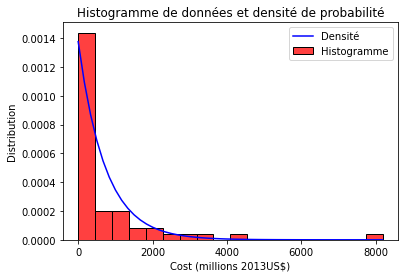

In [ ]:
X = np.linspace(v_cost.min(), v_cost.max())
den_exp = emv* np.exp(-(emv*X))

sn.histplot(v_cost, stat="density",color="red", label="Histogramme")
plt.plot(X, den_exp, color='blue', label = "Densité")
plt.legend()
plt.title("Histogramme de données et densité de probabilité")
plt.ylabel("Distribution")
plt.show()

## 2.3

Compte tenu des conditions de régularité, la borne de Cramér-Rao est définie comme la variance minimale qu'un estimateur peut atteindre et est exprimée pour l'expression suivante:

$
Var_{λ}[S(X)] \geq \frac{g'(λ)^{2}}{I(λ)}
$

où $I(λ)$ est l'information de Fisher.

Le biais de l'estimateur d'un  paramètre est la différence entre la valeur de l'espérance de cet estimateur et la valeur à estimer.

$
T_{1}(X) =  \frac{1}{n} \sum\limits_{i=1}^{n}X_{i}
$

$
E(T_{1}(X)) =  E(\frac{1}{n} \sum\limits_{i=1}^{n}X_{i})
$

$
E(T_{1}(X)) =  \frac{1}{n} \sum\limits_{i=1}^{n}E(X_{i})
$

$
E(T_{1}(X)) =  \frac{1}{n} \times \frac{n}{λ}
$

$
E(T_{1}(X)) = \frac{1}{λ} = g_{1}(\lambda)
$


Alors, selon le calcul ci-dessus, l'estimateur $T_{1}(X)$ est en effet non-biaisé. La dérivée au carré du paramètre $g_{1}(\lambda)$ est:

$
g'_{1}(λ) = - \frac{1}{λ^2}
$

$
g'_{1}(\lambda)^{2} = \frac{1}{λ^4}
$

L'information de Fisher est donnée par:

$
I(λ) = E_{λ}(\frac{∂^{2} log(f(X;λ))}{∂λ^{2}}^{2})
$

$
I(λ) = E_{λ}(\frac{∂(log(λ) - λX)}{∂λ}^{2})
$

$
= E_{λ}((\frac{1}{λ}-X)^2)
$

$
= E_{λ}(\frac{1}{λ^{2}}-\frac{2X}{λ}+X^2)
$

$
= E_{λ}(\frac{1}{λ^{2}}) - \frac{2}{λ} E(X) +E(X^2)
$

$
= E_{λ}(\frac{1}{λ^{2}}) - \frac{2}{λ} E(X) +(Var(X)+E(X)^{2})
$


Sachant que dans le cas de la loi exponentielle l'espérance est égale à $\frac{1}{λ}$ et la variance à $\frac{1}{\lambda^2}$, alors l'information de Fisher s'écrit de la façon suivante:

$
I(λ) = \frac{1}{λ^2}
$

$
I_{n}(\lambda) = n \frac{1}{λ^2}  \text{(loi exponentielle)}
$

Finalement, il est possible d'établir la variance de $T_{1}(X)$:

$Var(T_{1}(X)) = Var( \frac{1}{n} \sum\limits_{i=1}^{n}X_{i})$

$= \frac{1}{n^2} \sum\limits_{i=1}^{n}Var(X_{i})$

$
= \frac{1}{n^2} \frac{n}{\lambda^2}
$

$
= \frac{1}{n\lambda^2} < ∞
$

Et pour démontrer que T_{1}(X) est un estimateur efficace il suffit de vérifier si l'inégalité de Cramér-Rao est respecté:

$
Var_{λ}[S(X)] \geq \frac{g'(λ)^{2}}{I(λ)}
$


$
\frac{1}{n\lambda^2} \geq \frac{\frac{1}{λ^4}}{\frac{n}{λ^2}}
$

$
\frac{1}{n\lambda^2} = \frac{1}{n\lambda^2}
$

La variance de $T_{1}(X)$ atteint la borne de Cramér-Rao, alors $T_{1}(X)$ est un estimateur efficace pour $g_{1}(\lambda)$.

## 2.4

Selon l'exercice 2.1:

$
\frac{1}{λ} = \frac{1}{n} \sum\limits_{k=1}^{n}x_{k}
$

In [ ]:
T1 = v_cost.sum()/v_cost.count()
print('g1(λ) =', T1)

g1(λ) = 726.3363636363637


## 2.5

Dans l'exercice 2.3 il a déjà été vérifié que l'estimateur $T_{1}(X)$ est non-biaisé. Il faut calculer le biais du nouvel estimateur:

$
b(\lambda, \tilde{T}_{1,\eta}(X)) = E( \tilde{T}_{1,\eta}(X) - g_{1}(\lambda))
$

$
= E(\tilde{T}_{1,\eta}(X)) - g_{1}(\lambda)
$

$
= \eta E(T_{1}(X)) - g_{1}(\lambda)
$

$
= \eta g_{1}(\lambda) - g_{1}(\lambda)
$

$
= g_{1}(\lambda)(\eta - 1)
$

$
= \frac{1}{λ}(\eta - 1)
$

Le risque quadratique $R(\lambda, T_{1}(X))$ est calculé:

$
R(λ, T_{1}(X)) = E((T_{1}(X)-g_{1}(λ))^2)
$

$
= b(\lambda, T_{1}(X))^2 + Var(T_{1}(X))
$

$
= Var(T_{1}(X)) = \frac{1}{n\lambda^2}
$

Le risque quadratique $R(\lambda, \tilde{T}_{1,\eta}(X))$:

$
R(\lambda, \tilde{T}_{1,\eta}(X)) = E((\tilde{T}_{1,\eta}(X)-g_{1}(λ))^2)
$

$
= b(\lambda, \tilde{T}_{1,η}(X))^2 + Var(\tilde{T}_{1,η}(X))
$

$
= (\frac{1}{λ}(\eta - 1))^2 +  Var(\eta T_{1}(X))
$

$
= (\frac{1}{λ}(\eta - 1))^2 + \eta^2 Var(T_{1}(X))
$

$
= \frac{1}{λ^2} ((\eta - 1)^2 + \frac{\eta^2}{n})
$

Dans ces conditions, il est possible de préciser les valeurs de $\eta$ pour lesquels:

$R(\lambda, \tilde{T}_{1,\eta}(X))$ < $R(\lambda, T_{1}(X))$

$
\frac{1}{λ^2} ((\eta - 1)^2 + \frac{\eta^2}{n}) < \frac{1}{n\lambda^2}
$

$
 \frac{(\eta - 1)^2}{λ^2} + \frac{\eta^2 - 1}{n\lambda^2} < 0
$

$
 (\eta - 1)((\eta - 1) + \frac{\eta + 1}{n}) < 0
$

$
 (\eta - 1)( \frac{n(\eta - 1) +(\eta + 1)}{n}) < 0
$

$
(\eta - 1) [\eta(n + 1) +(1-n)] < 0
$

$
(\eta - 1) [\eta +\frac{(1-n)}{(n + 1)}] < 0
$

$
(\eta - 1) [\eta -\frac{(n-1)}{(n + 1)}] < 0
$

Pour que l'inegalité soit satisfaite il existe deux possibilités:

$
(i)=\begin{cases}
\eta   &  < 1\\
\eta   & > \frac{(n-1)}{(n + 1)}\\
\end{cases}
$

$
(ii)=\begin{cases}
\eta &  > 1\\
\eta & < \frac{(n-1)}{(n + 1)}\\
\end{cases}
$

Le deuxième cas n'est jamais satisfait car $∄η ∈ 𝐑 $ tel que $(ii)$ soit satisfait. Ainsi, l'intervalle des valeurs de $η$ pour que $R(\lambda, \tilde{T}_{1,\eta}(X))$ < $R(\lambda, T_{1}(X))$ est égal à:


$
η ∈ ](\frac{n-1}{n + 1}), 1[
$

Le résultat n'est pas en contradiction avec la question précédente, étant donné que l'estimateur $T_{1}(X)$ non-biaisé  est Uniformément de Variance Minimale parmi les estimateurs sans Biais (UMVB), c'est-à-dire, optimal parmi les estimateurs **sans biais**, tandis que l'estimateur $\tilde{T}_{1}(X)$ est biaisé.



## 2.6

Soit $X$ une variable aléatoire qui suit la loi exponentielle et soit $m$ la médiane, par définition la médiane est exprimée de la façon suivante:

$
m(\lambda) = \frac{log(2)}{λ}
$

Soit $\tilde{T}_{1,\eta}(X)$ sans biais de la médiane, alors:

$b(\lambda, \tilde{T}_{1,\eta}(X))=0$

$E(\tilde{T}_{1,\eta}(X) - m(λ)) = 0$

$E(\tilde{T}_{1,\eta}(X)) - m(λ) = 0$

$E(\tilde{T}_{1,\eta}(X)) =  m(λ)$

$\eta E(T_{1}(X)) =  \frac{log(2)}{λ}$

$\eta \frac{1}{λ} =  \frac{log(2)}{λ}$

$\eta  = log(2)$



In [ ]:
η = np.log(2)
m_λ = η*T1

X = np.median(v_cost)

print('Estimateur sans biais de la médiane = ', m_λ)
print('Médian Empirique = ',X)

Estimateur sans biais de la médiane =  503.4580025927086
Médian Empirique =  89.9


## 2.7

$R(\lambda, \tilde{T}_{1,\eta}(X))$ < $R(\lambda, T_{1}(X))$

$
\frac{1}{λ^2} (\frac{n}{n} (\eta - 1)^2 + \frac{\eta^2}{n}) < \frac{1}{n\lambda^2}
$

$
(n (\eta - 1)^2 + \eta^2) < 1
$

$
(n (\eta^2 - 2\eta +1) + \eta^2) < 1
$

$
n < \frac{(1- \eta^2)}{(\eta^2 - 2\eta +1)}
$

$n < 5,5178$

Alors, il est possible de constater que pour les valeurs de $n$ plus bas que $5,5178$ le risque quadratique de l'estimateur $ \tilde{T}_{1,\eta}(X)$ est plus bas que le risque quadratique de l'estimateur $T_{1}(X)$. L'analyse graphique ci-dessous avec cette constatation.


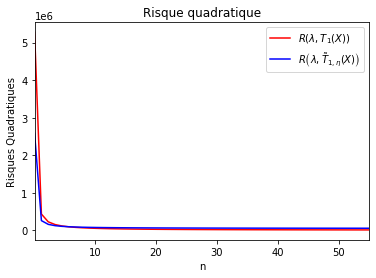

n = 5.517782706541858


In [ ]:
λ = 1/T1

n = np.linspace(0.1, len(v_cost))

R1 = 1/(n*(λ**2))
R1η = (1/(λ**2))*((η-1)**2 + (η**2)/n)

plt.plot(n, R1, color='red')
plt.plot(n, R1η, color = 'blue')
plt.title(r"Risque quadratique")
plt.legend([r"$R\left(\lambda, T_1\left(X\right)\right)$", r"$R\left(\lambda, \tilde{T}_{1, \eta}\left(X\right)\right)$"])
plt.xlabel("n")
plt.ylabel("Risques Quadratiques")
plt.xlim(n[0], n[-1])
plt.show()

n = (1- η**2)/(η**2-2*η+1)
print('n =', n)

# 3)

## 3.1)

Les $n$ coûts $X$ des accidents sont exprimés en millions de dollars, alors l'hypothèse:

$
H_{1}: \frac{1}{\lambda} < 1000
$

Et l'hypothèse nulle:

$
H_{0}: \frac{1}{\lambda} \geq 1000
$



## 3.2)


Par définition, pour un test unilatéral comme le défini, il est possible d'établir un test UPP de façon que le rapport de vraisemblance est monotone.

S'appuyant sur l'hypothèse que le modèle statistique donné est dominé et il existe une statistique scalaire T(X) telle que pour tout λ et λ' tels que $
\lambda < \lambda'$ le rapport de vraisemblance est une fonction strictement croissante de T(X) sur son ensemble de définition, écrite comme le suit:

$\frac{L(λ')}{L(\lambda)}=\frac{λ'^{(n)}e^{-λ'\sum\limits_{k=1}^{n}x_{k}}}{λ^{n}e^{-λ\sum\limits_{k=1}^{n}x_{k}}} = (\frac{\lambda'}{\lambda})^n e^{-(λ'-\lambda)\sum\limits_{k=1}^{n}x_{k}} $

Étant donné le théorème de Karlin-Rubin et en considérant le modèle des lois exponentielles, avec densité de probabilité dans la forme:

$
f(x) = g(\lambda) h(x) e^{(\eta(\lambda) T(x))}
$

Nous trouvons que:

$T(X) = \sum\limits_{k=1}^{n}x_{k} $

et

$\eta(\lambda) = \lambda - λ'$.


Soit $\eta(\lambda)$ non-décroissante, alors le modèle de loi exponentielle en question a un rapport de vraisemblance monotone dans la statistique $T(x)$.  Pour un test d'hypothèse unilatéral, il est possible de trouver un test UPP en sachant que le rapport de vraisemblance est monotone.

En plus, pour un rapport de vraisemblance monotone, le test:

$\delta(x) = 1_{(T(X)>c)}$

est UPP pour tout $c>0$. Alors:

$P_{\lambda}(T(X)>c|λ)=α$

$P_{\lambda}(\sum\limits_{k=1}^{n}x_{k}>c|λ=\frac{1}{1000})=α$

Soit l'ensemble de données indépendents et identiquement distribué de loi exponentielle avec un paramètre $\lambda$, il est possible d'affirmer que:

$\sum\limits_{k=1}^{n}x_{k} \sim Gamma(n, \lambda)$

Par conséquent, il est possible d'écrire que la probabilité de $T(X) > c$ est égal à la probabilité que $T(X)$ est plus grand ou égal à la fonction quantile:

$c = F^{-1}_{Gamma(n, \frac{1}{λ})}(\alpha)$

## 3.3)

In [ ]:
p_valeur = stats.gamma.cdf(x=v_cost.sum(),a=v_cost.size, scale=1000)
print("p-value:",p_valeur)

p-value: 0.013717486423264914


## 3.4)

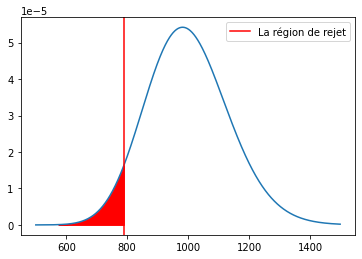

Point critique = 789.0147974522821


In [ ]:
g=stats.gamma(a=v_cost.size, scale=1000)
linspace_rejection = np.linspace(g.ppf(0.0001),  g.ppf(0.05))
plt.plot(np.arange(500,1500), g.pdf(x=np.arange(500*55,1500*55,55)))
plt.axvline(g.ppf(0.05)/55,color='r',label="La région de rejet")
plt.fill_between(linspace_rejection/55, g.pdf(x=linspace_rejection), color='r')
plt.legend(loc="upper right")
plt.show()
print("Point critique =",g.ppf(0.05)/55)

## 3.5)

En statistique, la puissance statistique d'un test est la probabilité de rejeter l'hypothèse nulle.

En observant la courbe ci-dessous il est possible de constater que l'augmentation de l'échantillon provoque une augmentation de la probabilité que le paramètre $\lambda$ soit plus grand que $10^{-3}$, e.g. $H_{0}$ soit rejeté.

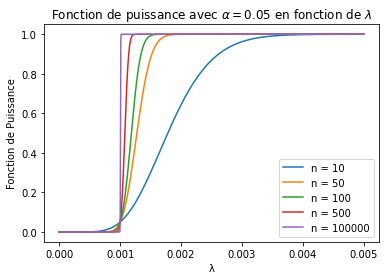

In [ ]:
# Defines the sample sizes and λ arrays
sample_sizes = [10, 50, 100, 500, 100000]
λ = np.linspace(1E-9, 5*10**(-3), 1000)

# Plots the power function for every n in sample_sizes
for n in sample_sizes:
    limit = stats.gamma.ppf(q=0.05, a=n, scale=1000)
    power_fcn = stats.gamma.cdf(x=limit, a=n, scale=1/λ)
    plt.plot(λ, power_fcn)

# Adds some details to the plot
plt.title(r"Fonction de puissance avec $\alpha = 0.05$ en fonction de $\lambda$")
plt.legend([f"n = {n}" for n in sample_sizes])
plt.xlabel("λ")
plt.ylabel("Fonction de Puissance")
plt.show()

## 3.6)

Selon le théorème de la limite centrale, une somme de variables aléatoires indépendantes et identiquement distribuées tend, le plus souvent, vers une variable aléatoire.

En supposant $X_{1},X_{2},...,X_{n}$ i.i.d. et que l'on calcule la moyenne arithmétique des valeurs observées plusieurs fois, alors le théorème centrale limite indique que la distribution de probabilité de la moyenne se rapprochera d'une distribution normale.

Dans ce cas:

$E(X_{i}=\frac{1}{λ})$ et $Var(X_{i}=\frac{1}{λ^2})$

Alors:

$\frac{1}{n} \sum\limits_{i=1}^{n}X_{i}
 \sim \mathcal{N}(\frac{n}{\lambda}, \frac{n}{\lambda^{2}})$

 Selon la question 3.2, la région de rejet est:

 $\sum\limits_{i=1}^{n}X_{i} > k'$

 $\alpha = sup_{\lambda \in \lambda_{0}}(\sum\limits_{i=1}^{n}X_{i} > k' | λ=\frac{1}{1000})$

Notons la fonction de répartition de $\mathcal{N}(\frac{n}{\lambda}, \frac{n}{\lambda^{2}})$ comme $F'$ alors:

$k' = F' ^{-1} (1-α)$





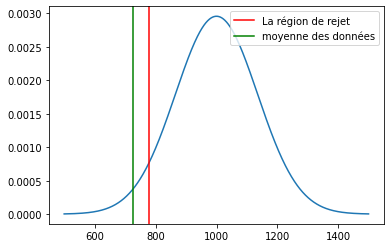

Le point critique est égal à:  778.8624451120565


In [ ]:
n=stats.norm.pdf(x=np.arange(500,1500), loc=1000, scale=1/math.sqrt(v_cost.count())*1000)
plt.plot(np.arange(500,1500),n)
plt.axvline(1000-(1.64*1000)/math.sqrt(v_cost.count()),color='r',label="La région de rejet")
plt.axvline(v_cost.mean(),color='g',label="moyenne des données")
plt.legend(loc="upper right")
plt.show()
print("Le point critique est égal à: ",(1000-(1.64*1000)/math.sqrt(v_cost.count())))